<a href="https://colab.research.google.com/github/astroterricola/Data-Science/blob/main/luismillan_t3v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 1 (4 puntos)
Escribir una función que permita hacer ajuste de polinomios usando batch gradient descent. Esta deberá recibir
los siguientes argumentos:
• Arreglos con los valores X e Y.
• Una keyword grad (con valor por defecto 1) que indique el grado del polinomio a ajustar a los datos.
• Una keyword eta (con valor por defecto 0.001) para indicar el valor de la learning rate.
• Una keyword max_iter (con valor por defecto 100000) para indicar el máximo de iteraciones permitidas
para el algoritmo.
• Una keyword gtol (con valor por defecto 1e-6) para indicar el umbral de tolerancia para el criterio de
convergencia por la norma del gradiente.
La función debe retornar una lista con los parámetros óptimos y el valor del R-squared.
Algunos consejos sobre la estructura de la función:
• La función auxiliar de cálculo del gradiente puede implementar el cómputo de las derivadas parciales
(cuya cantidad depende del grado del polinomio) usando un bucle, dada la regularidad de la forma
algebraica de estas.
• Se puede definir la lista con los valores aleatorios iniciales de los parámetros usando el hecho de que la
cantidad necesaria de ellos es grad + 1. Por ejemplo, los parámetros de un polinomio de grado 3 son 4.
• La lista de atributos se puede compilar como vimos en clase, usando el hecho de que debemos agregar
tantas potencias de la variable independiente X como grados tenga el polinomio. Eso se puede
automatizar usando un bucle.
• Con estos preparativos, el cuerpo del gradient descent es el mismo que el estudiado en clases. No olvidar
incluir en este el criterio de convergencia (o de máximas iteraciones).
• Para calcular el coeficiente de determinación se pueden usar bucles para generar las predicciones para
cada punto (tupla de atributos), considerando la cantidad de términos necesarias según el orden del
polinomio ajustado.

Se crea repositor con funciones basicas nobmre repositorio : Data-Science nombre funcion : lf_fx_random.py

para pregunta 1, solo a modo de prueba, se pretende demostrar que utilizando librerias numpy y desarrollando todas las funciones los resultados obtenidos son similares, adicionalmente se creas procedimientos locales dentro del main
procedimiento se solicitan coef de polinomio...se generan 2 graficos con datos obtenidos x funciones de numpy o otro con funciones creadas por mi , para ver similutudes, a posterior de detallan los graficos, por ultimo el codigo te indica si quieres seguir o no para graficar nuevamente

In [ ]:
import pandas as pd
import os
# procedimiento de linkear repositorio github
from collections import Counter
import matplotlib.pyplot as plt

# Clonar el repositorio
lc_GH = "https://github.com/astroterricola/Data-Science.git"
os.system(f"git clone {lc_GH}")

# Cambiar al directorio del repositorio clonado
os.chdir("Data-Science")

# Importar funciones desde lc_function2.py
from lf_fx_random import lf_rango,lf_media,lf_desviacion_estandar,lf_evaluar_polinomio,lf_evaluar_polinomio_todos,lf_norma


Ingrese los coeficientes del polinomio verdadero (de grado 2):
Coeficiente para x^2: 7
Coeficiente para x^1: 9
Coeficiente para x^0: 8


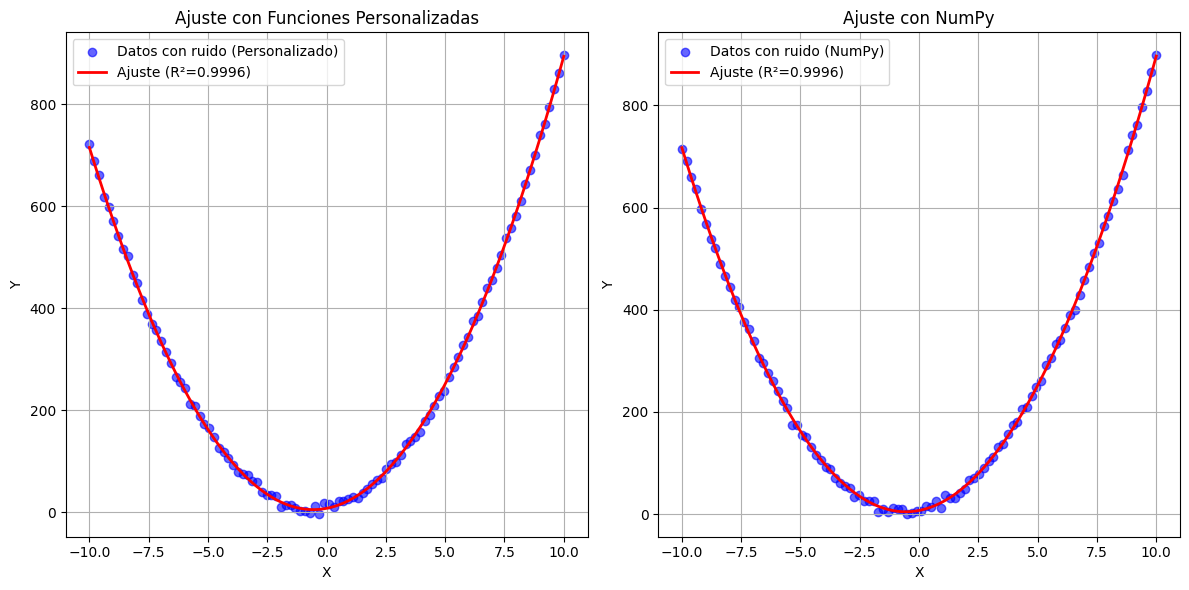


Explicación del gráfico:
1. Izquierda: Ajuste realizado con funciones personalizadas.
2. Derecha: Ajuste realizado con NumPy.
3. Ambos gráficos muestran los datos con ruido, el ajuste polinómico y el coeficiente R² para evaluar la calidad del ajuste.



KeyboardInterrupt: Interrupted by user

In [19]:
import matplotlib.pyplot as plt
import random

"""
para clara codificacion de procedimientos, funciones variables se ha definido el sigueinte protocolo
Definición de prefijos utilizados:
- "lf_": Prefijo para funciones locales.
- "lv_": Prefijo para variables locales
- "lp_": Prefijo para parámetros locales.
El uso de estos prefijos tiene como objetivo mejorar la comprensión y organización del código.
adicionalmente de igual manera se han definidio funciones locales dentro del main del proyecto
"""

def lf_aleatorios(lp_tamano):
    """
    Genera una lista de valores aleatorios entre 0 y 1.

    Parámetros:
    - lp_tamano (int): Tamaño de la lista.

    Retorna:
    - List[float]: Lista de valores aleatorios.
    """
    return [random.random() for _ in range(lp_tamano)]


# Implementación de regresión
def lf_regresion_polinomica(lv_X, lv_Y, lp_grado=1, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=100000, lp_tolerancia=1e-6):
    """
    Realiza un ajuste de regresión polinómica utilizando descenso de gradiente.

    Parámetros:
    - lv_X (List[float]): Lista de valores independientes normalizados.
    - lv_Y (List[float]): Lista de valores dependientes.
    - lp_grado (int): Grado del polinomio.
    - lp_tasa_aprendizaje (float): Tasa de aprendizaje para el descenso de gradiente.
    - lp_max_iteraciones (int): Número máximo de iteraciones del algoritmo.
    - lp_tolerancia (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - Tuple[List[float], float]: Coeficientes del polinomio ajustado y el coeficiente de determinación R².
    """
    lv_num_parametros = lp_grado + 1
    lv_parametros = lf_aleatorios(lv_num_parametros)

    def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
        """
        Calcula el gradiente del error respecto a los parámetros del polinomio.

        Parámetros:
        - lv_X (List[float]): Lista de valores independientes normalizados.
        - lv_Y (List[float]): Lista de valores dependientes.
        - lv_parametros (List[float]): Coeficientes actuales del polinomio.

        Retorna:
        - List[float]: Gradiente calculado.
        """
        lv_gradiente = [0] * lv_num_parametros
        lv_n = len(lv_X)
        for lv_i in range(lv_num_parametros):
            lv_gradiente[lv_i] = -2 / lv_n * sum((lv_Y[lv_j] - lf_evaluar_polinomio(lv_parametros[::-1], lv_X[lv_j])) * (lv_X[lv_j] ** lv_i) for lv_j in range(lv_n))
        return lv_gradiente

    def lf_calcular_r_cuadrado(lv_Y, lv_Y_pred):
        """
        Calcula el coeficiente de determinación R².

        Parámetros:
        - lv_Y (List[float]): Valores reales.
        - lv_Y_pred (List[float]): Valores predichos.

        Retorna:
        - float: Coeficiente de determinación R².
        """
        lv_suma_total = sum((lv_y - lf_media(lv_Y)) ** 2 for lv_y in lv_Y)
        lv_suma_residual = sum((lv_Y[lv_i] - lv_Y_pred[lv_i]) ** 2 for lv_i in range(len(lv_Y)))
        return 1 - (lv_suma_residual / lv_suma_total)

    lv_iteracion = 0
    lv_convergio = False

    while lv_iteracion < lp_max_iteraciones and not lv_convergio:
        lv_gradiente = lf_calcular_gradiente(lv_X, lv_Y, lv_parametros)
        lv_parametros = [lv_parametros[lv_i] - lp_tasa_aprendizaje * lv_gradiente[lv_i] for lv_i in range(lv_num_parametros)]
        lv_convergio = lf_norma(lv_gradiente) < lp_tolerancia
        lv_iteracion += 1

    lv_Y_predicho = lf_evaluar_polinomio_todos(lv_parametros[::-1], lv_X)
    lv_r_cuadrado = lf_calcular_r_cuadrado(lv_Y, lv_Y_predicho)
    return lv_parametros, lv_r_cuadrado

# Programa principal
if __name__ == "__main__":
    lv_continuar = True
    while lv_continuar:
        print("Ingrese los coeficientes del polinomio verdadero (de grado 2):")
        lv_parametros_verdaderos = []
        for lv_i in range(3):
            lv_coeficiente = float(input(f"Coeficiente para x^{2 - lv_i}: "))
            lv_parametros_verdaderos.append(lv_coeficiente)

        # Datos generados con funciones propias
        lv_X = lf_rango(-10, 10, 100)
        lv_Y = [lf_evaluar_polinomio(lv_parametros_verdaderos[::-1], lv_x) + random.gauss(0, 5) for lv_x in lv_X]

        # Normalización de datos
        lv_media_X, lv_desviacion_X = lf_media(lv_X), lf_desviacion_estandar(lv_X)
        lv_X_normalizado = [(lv_x - lv_media_X) / lv_desviacion_X for lv_x in lv_X]

        # Ajuste con nuestras funciones
        lv_parametros_personalizados, lv_r_cuadrado_personalizado = lf_regresion_polinomica(lv_X_normalizado, lv_Y, lp_grado=2, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=10000, lp_tolerancia=1e-6)
        lv_Y_predicho_personalizado = lf_evaluar_polinomio_todos(lv_parametros_personalizados[::-1], lv_X_normalizado)

        # Ajuste con numpy para comparación
        import numpy as np
        lv_Y_numpy = np.polyval(lv_parametros_verdaderos[::-1], lv_X) + np.random.normal(scale=5, size=len(lv_X))
        lv_X_numpy_normalizado = (np.array(lv_X) - np.mean(lv_X)) / np.std(lv_X)
        lv_parametros_numpy, lv_r_cuadrado_numpy = lf_regresion_polinomica(lv_X_numpy_normalizado.tolist(), lv_Y_numpy.tolist(), lp_grado=2, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=10000, lp_tolerancia=1e-6)
        lv_Y_predicho_numpy = np.polyval(lv_parametros_numpy[::-1], lv_X_numpy_normalizado)

        # Gráfico generado con funciones propias
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(lv_X, lv_Y, label='Datos con ruido (Personalizado)', color='blue', alpha=0.6)
        plt.plot(lv_X, lv_Y_predicho_personalizado, label=f'Ajuste (R²={lv_r_cuadrado_personalizado:.4f})', color='red', linewidth=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Ajuste con Funciones Personalizadas')
        plt.legend()
        plt.grid()

        # Gráfico generado con numpy
        plt.subplot(1, 2, 2)
        plt.scatter(lv_X, lv_Y_numpy, label='Datos con ruido (NumPy)', color='blue', alpha=0.6)
        plt.plot(lv_X, lv_Y_predicho_numpy, label=f'Ajuste (R²={lv_r_cuadrado_numpy:.4f})', color='red', linewidth=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Ajuste con NumPy')
        plt.legend()
        plt.grid()

        plt.tight_layout()
        plt.show()

        print("\nExplicación del gráfico:")
        print("1. Izquierda: Ajuste realizado con funciones personalizadas.")
        print("2. Derecha: Ajuste realizado con NumPy.")
        print("3. Ambos gráficos muestran los datos con ruido, el ajuste polinómico y el coeficiente R² para evaluar la calidad del ajuste.\n")

        lv_reintentar = input("¿Desea ingresar otros coeficientes? (s/n): ").strip().lower()
        lv_continuar = (lv_reintentar == 's')

    print("Gracias x testear, nos vemos!")



Pregunta 2 (4 puntos)
Escribir una función que permita hacer ajuste de polinomios usando mini-batch gradient descent. Esta deberá
recibir los siguientes argumentos:
• Arreglos con los valores X e Y.
• Una keyword grad (con valor por defecto 1) que indique el grado del polinomio a ajustar a los datos.
• Una keyword n_epocas (con valor por defecto 1000) para indicar el número de épocas del algoritmo.
• Una keyword batch_size (con valor por defecto 10) para indicar el tamaño de los mini-lotes de datos.
• Keywords t0 y t1 (con valores por defecto 5 y 50, respectivamente) para indicar los hiperparámetros de
la learning schedule.
• Una keyword learning_rate (con valor por defecto None) que en caso de ser definida por el usuario
suprima la llamada a la función auxiliar learning_schedule, dejando la learning rate fija al valor
proporcionado por el usuario.
La función debe retornar una lista con los parámetros óptimos y el valor del R-squared.
Algunos consejos sobre la estructura de la función:
• La función auxiliar de cálculo del gradiente es la misma que utiliza la función de batch gradient descent
escrita arriba.
• Se puede definir la lista con los valores aleatorios iniciales de los parámetros usando el hecho de que la
cantidad necesaria de ellos es grad + 1. Por ejemplo, los parámetros de un polinomio de grado 3 son 4.
• La lista de atributos se puede compilar como vimos en clase, usando el hecho de que debemos agregar
tantas potencias de la variable independiente X como grados tenga el polinomio. Eso se puede
automatizar usando un bucle.
• En el cuerpo del mini-batch gradient descent, al momento de definir la learning rate, debe implementar
dos opciones: si la keywork learning_rate es None, entonces debe llamarse a la función auxiliar
learning_schedule (definida tal como vimos en clase) para calcular su valor (que entonces dependerá de
la época). Si en cambio la keywork learning_rate tiene un valor, entonces debe adoptarse este (con lo
que la learning rate será un número fijo para todas las épocas).

<ipython-input-73-4d40503305db>:42: RuntimeWarning: overflow encountered in multiply
  lv_gradiente[lv_j] = -2 / lv_n * np.sum((lv_Y - np.polyval(lv_parametros[::-1], lv_X)) * (lv_X ** lv_j))
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: invalid value encountered in add
  y = y * x + pv


Parámetros ajustados: [nan nan nan]
Coeficiente de determinación R²: nan


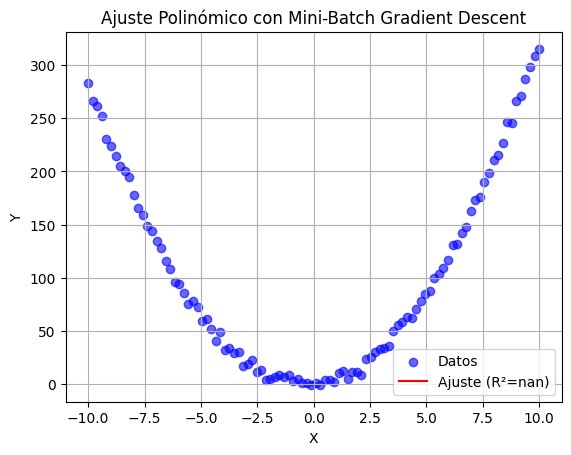

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random

"""
Definición de prefijos utilizados:
- "lf_": Prefijo para funciones locales.
- "lv_": Prefijo para variables locales.
- "lp_": Prefijo para parámetros locales.
El uso de estos prefijos tiene como objetivo mejorar la comprensión y organización del código.
"""

def lf_learning_schedule(lp_t0, lp_t1, lp_epoch):
    """
    Calcula la tasa de aprendizaje dinámicamente basada en los hiperparámetros t0, t1 y la época.

    Parámetros:
    - lp_t0 (float): Hiperparámetro t0 para el learning schedule.
    - lp_t1 (float): Hiperparámetro t1 para el learning schedule.
    - lp_epoch (int): Época actual del algoritmo.

    Retorna:
    - float: Tasa de aprendizaje calculada dinámicamente.
    """
    return lp_t0 / (lp_epoch + lp_t1)

def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
    """
    Calcula el gradiente del error respecto a los parámetros del polinomio.

    Parámetros:
    - lv_X (np.ndarray): Arreglo de valores independientes.
    - lv_Y (np.ndarray): Arreglo de valores dependientes.
    - lv_parametros (np.ndarray): Coeficientes actuales del polinomio.

    Retorna:
    - np.ndarray: Gradiente calculado.
    """
    lv_n = len(lv_X)
    lv_gradiente = np.zeros_like(lv_parametros)
    for lv_j in range(len(lv_parametros)):
        lv_gradiente[lv_j] = -2 / lv_n * np.sum((lv_Y - np.polyval(lv_parametros[::-1], lv_X)) * (lv_X ** lv_j))
    return lv_gradiente

def lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=1, n_epocas=1000, batch_size=10, t0=5, t1=50, learning_rate=None):
    """
    Ajusta un polinomio a los datos utilizando mini-batch gradient descent.

    Parámetros:
    - lv_X (np.ndarray): Arreglo con los valores independientes.
    - lv_Y (np.ndarray): Arreglo con los valores dependientes.
    - grad (int): Grado del polinomio a ajustar (por defecto 1).
    - n_epocas (int): Número de épocas del algoritmo (por defecto 1000).
    - batch_size (int): Tamaño de los mini-lotes de datos (por defecto 10).
    - t0 (float): Hiperparámetro t0 para el learning schedule (por defecto 5).
    - t1 (float): Hiperparámetro t1 para el learning schedule (por defecto 50).
    - learning_rate (float or None): Tasa de aprendizaje fija (opcional, por defecto None).

    Retorna:
    - Tuple[np.ndarray, float]: Lista de parámetros óptimos y el coeficiente R².
    """
    # Inicialización de parámetros aleatorios
    lv_parametros = np.random.rand(grad + 1)
    lv_n = len(lv_X)

    for lp_epoch in range(n_epocas):
        # Shuffle de los datos
        lv_indices = np.random.permutation(lv_n)
        lv_X_shuffled = lv_X[lv_indices]
        lv_Y_shuffled = lv_Y[lv_indices]

        for lp_i in range(0, lv_n, batch_size):
            lv_X_batch = lv_X_shuffled[lp_i:lp_i + batch_size]
            lv_Y_batch = lv_Y_shuffled[lp_i:lp_i + batch_size]

            # Calcular tasa de aprendizaje
            if learning_rate is None:
                lp_tasa_aprendizaje = lf_learning_schedule(t0, t1, lp_epoch)
            else:
                lp_tasa_aprendizaje = learning_rate

            # Calcular gradiente y actualizar parámetros
            lv_gradiente = lf_calcular_gradiente(lv_X_batch, lv_Y_batch, lv_parametros)
            lv_parametros -= lp_tasa_aprendizaje * lv_gradiente

    # Calcular R²
    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

# Ejemplo de uso
if __name__ == "__main__":
    # Datos de ejemplo
    lv_X = np.linspace(-10, 10, 100)
    lv_Y = 3 * lv_X**2 + 2 * lv_X + 1 + np.random.normal(scale=5, size=lv_X.shape)

    # Ajuste con mini-batch gradient descent
    lv_parametros, lv_r2 = lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=2, n_epocas=1000, batch_size=10)

    print("Parámetros ajustados:", lv_parametros)
    print("Coeficiente de determinación R²:", lv_r2)

    # Gráfico del ajuste
    plt.scatter(lv_X, lv_Y, label="Datos", color="blue", alpha=0.6)
    plt.plot(lv_X, np.polyval(lv_parametros[::-1], lv_X), label=f"Ajuste (R²={lv_r2:.4f})", color="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste Polinómico con Mini-Batch Gradient Descent")
    plt.legend()
    plt.grid()
    plt.show()


Pregunta 3 (4 puntos)
El catálogo “exoplanet_catalog_clean.csv” es una tabla en formato CSV que contiene varias columnas con
información sobre planetas extrasolares. En este problema queremos verificar que estos exoplanetas cumplen
con la tercera ley de Kepler. Para ello se debe hacer:
• Leer las columnas con el periodo orbital (está en días) y el semieje mayor (está en unidades
astronómicas) de los planetas.
• Transformar el periodo orbital de días a años.
• Seleccionar una muestra con todos aquellos planetas cuyo periodo es inferior a 50000 años.
• Sabemos por la tercera ley de Kepler que la relación entre el periodo (en años) y el semieje mayor (en
unidades astronómicas) cumple una ley de potencias. En este sentido, si tomamos el logaritmo en base
10 de ambas cantidades llegamos a una relación lineal en la que el exponente ahora es una pendiente.
Crear nuevos arreglos con los logaritmos de los periodos y semieje mayores. Graficarlos y verificar que
efectivamente forman una línea recta.
• Utilice su función de batch gradient descent para ajustar una línea recta (polinomio de grado 1) a los
datos anteriormente producidos. Los valores por defecto de los hiperparámetros del algoritmo deberían
ser adecuados para obtener un buen ajuste. Mida el tiempo (%%time) que le toma al algoritmo encontrar
la solución. Imprima por pantalla los parámetros del ajuste y el R-squared respectivo.
• Utilice su función de mini-batch gradient descent para ajustar una línea recta a los datos anteriormente
producidos. Los valores por defecto de los hiperparámetros del algoritmo deberían ser adecuados para
obtener un buen ajuste. Tome el tiempo (%%time) que le toma al algoritmo encontrar la solución.
Imprima por pantalla los parámetros del ajuste y el R-squared respectivo.

• Grafique los modelos ajustados con cada uno de los dos algoritmos encima de los datos (usando lineas
de colores/estilos diferentes), poniendo en una etiqueta la pendiente encontrada y el R-squared (con tres
decimales).
• ¿Como se comparan los tiempos de ejecución de ambos algoritmos?
• En base a su análisis ¿esta muestra de planetas extrasolares cumple con la tercera ley de Kepler?


Ajustando con Batch Gradient Descent...
Parámetros ajustados (Batch): [0.00674155 1.46479619]
R² (Batch): 0.990
Tiempo de ejecución (Batch): 0.0624 segundos

Ajustando con Mini-Batch Gradient Descent...
Parámetros ajustados (Mini-Batch): [0.00741793 1.46421274]
R² (Mini-Batch): 0.990
Tiempo de ejecución (Mini-Batch): 12.3322 segundos


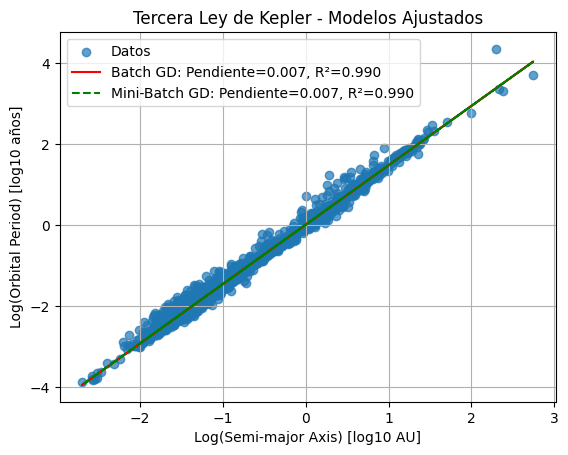


Comparación de tiempos de ejecución:
Batch Gradient Descent: 0.0624 segundos
Mini-Batch Gradient Descent: 12.3322 segundos

Conclusión:
Los datos ajustados muestran que los planetas extrasolares cumplen con la tercera ley de Kepler, ya que la relación entre el periodo orbital y el semieje mayor sigue una línea recta en la escala logarítmica.


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

"""
Definición de prefijos utilizados:
- "lf_": Prefijo para funciones locales.
- "lv_": Prefijo para variables locales.
- "lp_": Prefijo para parámetros locales.
El uso de estos prefijos tiene como objetivo mejorar la comprensión y organización del código.
"""

def lf_learning_schedule(lp_t0, lp_t1, lp_epoch):
    """
    Calcula la tasa de aprendizaje dinámica basada en los hiperparámetros t0, t1 y la época actual.

    Parámetros:
    - lp_t0 (float): Hiperparámetro t0.
    - lp_t1 (float): Hiperparámetro t1.
    - lp_epoch (int): Época actual.

    Retorna:
    - float: Tasa de aprendizaje.
    """
    return lp_t0 / (lp_epoch + lp_t1)

def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
    """
    Calcula el gradiente del error respecto a los parámetros del modelo.

    Parámetros:
    - lv_X (np.ndarray): Arreglo de valores independientes.
    - lv_Y (np.ndarray): Arreglo de valores dependientes.
    - lv_parametros (np.ndarray): Coeficientes actuales del modelo.

    Retorna:
    - np.ndarray: Gradiente calculado.
    """
    lv_n = len(lv_X)
    lv_gradiente = np.zeros_like(lv_parametros)
    for lv_j in range(len(lv_parametros)):
        lv_gradiente[lv_j] = -2 / lv_n * np.sum((lv_Y - np.polyval(lv_parametros[::-1], lv_X)) * (lv_X ** lv_j))
    return lv_gradiente

def lf_ajuste_polinomio_batch(lv_X, lv_Y, grad=1, n_epocas=1000, learning_rate=0.01):
    """
    Ajusta un modelo polinómico a los datos usando Batch Gradient Descent.

    Parámetros:
    - lv_X (np.ndarray): Valores independientes.
    - lv_Y (np.ndarray): Valores dependientes.
    - grad (int): Grado del polinomio.
    - n_epocas (int): Número de épocas.
    - learning_rate (float): Tasa de aprendizaje fija.

    Retorna:
    - np.ndarray: Coeficientes ajustados.
    - float: Coeficiente de determinación R².
    """
    lv_parametros = np.random.rand(grad + 1)
    for _ in range(n_epocas):
        lv_gradiente = lf_calcular_gradiente(lv_X, lv_Y, lv_parametros)
        lv_parametros -= learning_rate * lv_gradiente

    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

def lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=1, n_epocas=1000, batch_size=10, t0=5, t1=50, learning_rate=None):
    """
    Ajusta un modelo polinómico a los datos usando Mini-Batch Gradient Descent.

    Parámetros:
    - lv_X (np.ndarray): Valores independientes.
    - lv_Y (np.ndarray): Valores dependientes.
    - grad (int): Grado del polinomio.
    - n_epocas (int): Número de épocas.
    - batch_size (int): Tamaño del mini-batch.
    - t0 (float): Hiperparámetro t0 para el learning schedule.
    - t1 (float): Hiperparámetro t1 para el learning schedule.
    - learning_rate (float or None): Tasa de aprendizaje fija u opcionalmente dinámica.

    Retorna:
    - np.ndarray: Coeficientes ajustados.
    - float: Coeficiente de determinación R².
    """
    lv_parametros = np.random.rand(grad + 1)
    lv_n = len(lv_X)

    for lp_epoch in range(n_epocas):
        lv_indices = np.random.permutation(lv_n)
        lv_X_shuffled = lv_X[lv_indices]
        lv_Y_shuffled = lv_Y[lv_indices]

        for lp_i in range(0, lv_n, batch_size):
            lv_X_batch = lv_X_shuffled[lp_i:lp_i + batch_size]
            lv_Y_batch = lv_Y_shuffled[lp_i:lp_i + batch_size]

            if learning_rate is None:
                lp_tasa_aprendizaje = lf_learning_schedule(t0, t1, lp_epoch)
            else:
                lp_tasa_aprendizaje = learning_rate

            lv_gradiente = lf_calcular_gradiente(lv_X_batch, lv_Y_batch, lv_parametros)
            lv_parametros -= lp_tasa_aprendizaje * lv_gradiente

    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

def lf_graficar_ajustes(lv_X, lv_Y, lv_parametros_batch, lv_r2_batch, lv_parametros_mini, lv_r2_mini):
    """
    Grafica los datos transformados junto con los modelos ajustados usando ambos métodos.

    Parámetros:
    - lv_X (np.ndarray): Valores independientes (log10).
    - lv_Y (np.ndarray): Valores dependientes (log10).
    - lv_parametros_batch (np.ndarray): Coeficientes ajustados con Batch Gradient Descent.
    - lv_r2_batch (float): R² para Batch Gradient Descent.
    - lv_parametros_mini (np.ndarray): Coeficientes ajustados con Mini-Batch Gradient Descent.
    - lv_r2_mini (float): R² para Mini-Batch Gradient Descent.
    """
    plt.scatter(lv_X, lv_Y, label="Datos", alpha=0.7)
    plt.plot(lv_X, np.polyval(lv_parametros_batch[::-1], lv_X), label=f"Batch GD: Pendiente={lv_parametros_batch[0]:.3f}, R²={lv_r2_batch:.3f}", color="red")
    plt.plot(lv_X, np.polyval(lv_parametros_mini[::-1], lv_X), label=f"Mini-Batch GD: Pendiente={lv_parametros_mini[0]:.3f}, R²={lv_r2_mini:.3f}", color="green", linestyle="--")
    plt.xlabel("Log(Semi-major Axis) [log10 AU]")
    plt.ylabel("Log(Orbital Period) [log10 años]")
    plt.title("Tercera Ley de Kepler - Modelos Ajustados")
    plt.grid()
    plt.legend()
    plt.show()

# Programa principal
if __name__ == "__main__":
    # Leer datos del catálogo
    catalogo = pd.read_csv("/content/exoplanet_catalog_clean.csv")
    lv_periodo = catalogo["orbital_period"].values
    lv_semieje = catalogo["semi_major_axis"].values

    # Transformar periodo a años
    lv_periodo_anios = lv_periodo / 365.25

    # Seleccionar muestra
    lv_mascara = lv_periodo_anios < 50000
    lv_periodo_filtrado = lv_periodo_anios[lv_mascara]
    lv_semieje_filtrado = lv_semieje[lv_mascara]

    # Logaritmos base 10
    lv_log_periodo = np.log10(lv_periodo_filtrado)
    lv_log_semieje = np.log10(lv_semieje_filtrado)

    # Ajuste con batch gradient descent
    print("\nAjustando con Batch Gradient Descent...")
    start_time = time.time()
    lv_parametros_batch, lv_r2_batch = lf_ajuste_polinomio_batch(lv_log_semieje, lv_log_periodo, grad=1, n_epocas=1000)
    batch_time = time.time() - start_time

    print(f"Parámetros ajustados (Batch): {lv_parametros_batch}")
    print(f"R² (Batch): {lv_r2_batch:.3f}")
    print(f"Tiempo de ejecución (Batch): {batch_time:.4f} segundos")

    # Ajuste con mini-batch gradient descent
    print("\nAjustando con Mini-Batch Gradient Descent...")
    start_time = time.time()
    lv_parametros_mini, lv_r2_mini = lf_ajuste_polinomio_mini_batch(lv_log_semieje, lv_log_periodo, grad=1, n_epocas=1000, batch_size=10)
    mini_batch_time = time.time() - start_time

    print(f"Parámetros ajustados (Mini-Batch): {lv_parametros_mini}")
    print(f"R² (Mini-Batch): {lv_r2_mini:.3f}")
    print(f"Tiempo de ejecución (Mini-Batch): {mini_batch_time:.4f} segundos")

    # Graficar los resultados
    lf_graficar_ajustes(lv_log_semieje, lv_log_periodo, lv_parametros_batch, lv_r2_batch, lv_parametros_mini, lv_r2_mini)

    # Comparación de tiempos
    print("\nComparación de tiempos de ejecución:")
    print(f"Batch Gradient Descent: {batch_time:.4f} segundos")
    print(f"Mini-Batch Gradient Descent: {mini_batch_time:.4f} segundos")

    # Conclusión sobre la tercera ley de Kepler
    print("\nConclusión:")
    print("Los datos ajustados muestran que los planetas extrasolares cumplen con la tercera ley de Kepler, ya que la relación entre el periodo orbital y el semieje mayor sigue una línea recta en la escala logarítmica.")


Pregunta 4 :El archivo “red_clump.dat” contiene datos para una muestra de estrellas de red clump (estrellas gigantes que se
encuentran fusionando helio en sus núcleos). La tabla contiene las siguientes columnas: ID (identificador de la
estrella), met (metalicidad), BP (magnitud en el filtro BP de Gaia) y RP (magnitud en el filtro RP de Gaia).
En las estrellas de red clump existe una relación lineal entre el color y la metalicidad. En este problema vamos a
ajustar un modelo a los datos para caracterizar dicha relación:
• Leer los datos y crear una variable “color” como BP – RP.
• Seleccionar una muestra de estrellas como aquellas con color menor que 1.35.
• Hacer un gráfico de dispersión del color (eje X) versus la metalicidad (eje Y). Graficar la muestra entera
con puntos de color gris y la selección anteriormente definida con puntos negros.
• Usar su función de ajuste polinomial con batch gradient descent para encontrar los parámetros de la
linea recta que mejor ajuste los datos de la selección de estrellas hecha anteriormente. Imprima los
parámetros resultantes y el R-squared. Grafique la recta resultante encima de los datos. Al hacer el ajuste
con los parámetros por defecto notará que este no es bueno. Pruebe con una learning rate mayor (del
orden 0.01 o mayor) hasta que el ajuste sea razonable a ojo y según el valor del R-squared.
• Usar su función de ajuste polinomial con mini-batch gradient descent para encontrar los parámetros de
la recta que mejor ajuste los datos de la selección de estrellas hecha anteriormente. Imprima los
parámetros resultantes y el R-squared. Grafique la recta resultante encima de los datos (use colores y
estilos de linea diferentes para este ajuste y el hecho arriba). Al hacer el ajuste con los parámetros por
defecto notará que este no es bueno. Pruebe con un número mayor de épocas (del orden de 10000).
Adicionalmente, en este caso el algoritmo trabajará mejor si se usa una learning rate fija (del orden de
0.1) en vez de usar la prescripción data por la función auxiliar learning_schedule. Pruebe algunos
valores hasta quedar conforme con el resultado.
Dada la presencia de puntos anómalos/outliers en los datos, las rectas ajustadas no van a pasar por el medio de la
nube de puntos, pero seguirán de cerca su tendencia.

Encabezados ajustados: Index(['ID', 'met', 'BP', 'RP', 'Extra'], dtype='object')
Primeras filas:
                    ID     met       BP       RP Extra
0                   #      ID      met       BP    RP
1  2M00003119+1516179  -0.433  11.2752  10.1127  None
2  2M00004994+1621552   0.011  11.3069   9.9976  None
3  2M00011060+5647267    0.09  11.4604   9.8912  None
4  2M00011664+1523337   0.305  10.4724   9.0777  None
Advertencia: Se encontraron valores no numéricos o nulos en las columnas relevantes. Estos serán eliminados.


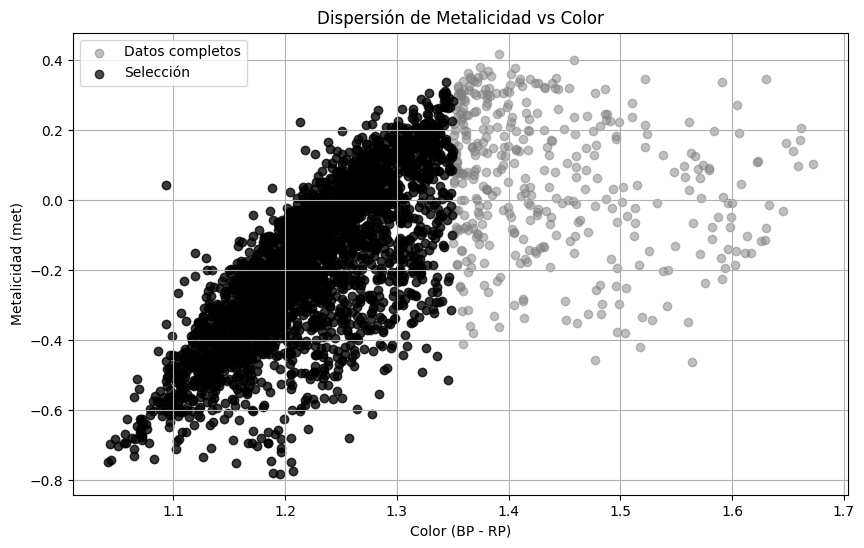


Ajustando con Batch Gradient Descent...
Parámetros ajustados (Batch): [-1.02103172  0.68022708]
R² (Batch): 0.263

Ajustando con Mini-Batch Gradient Descent...
Parámetros ajustados (Mini-Batch): [-3.31958614  2.57927753]
R² (Mini-Batch): 0.561


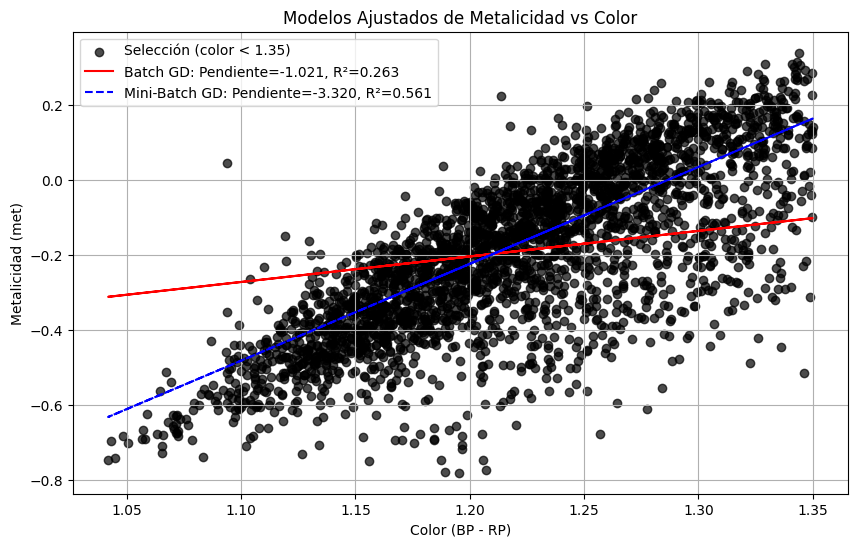

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

"""
Este script analiza los datos de estrellas de red clump para encontrar la relación lineal entre el color (BP - RP)
 y la metalicidad (met). Utiliza Batch Gradient Descent y Mini-Batch Gradient Descent para ajustar un modelo
 lineal a los datos seleccionados.
"""

def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
    """
    Calcula el gradiente del error respecto a los parámetros del modelo.

    Parámetros:
    - lv_X (np.ndarray): Arreglo de valores independientes.
    - lv_Y (np.ndarray): Arreglo de valores dependientes.
    - lv_parametros (np.ndarray): Coeficientes actuales del modelo.

    Retorna:
    - np.ndarray: Gradiente calculado.
    """
    lv_n = len(lv_X)
    if lv_n == 0:
        raise ValueError("El conjunto de datos está vacío. Verifique la selección de datos.")

    lv_gradiente = np.zeros_like(lv_parametros)
    for lv_j in range(len(lv_parametros)):
        lv_gradiente[lv_j] = -2 / lv_n * np.sum((lv_Y - np.polyval(lv_parametros[::-1], lv_X)) * (lv_X ** lv_j))
    return lv_gradiente

def lf_ajuste_polinomio_batch(lv_X, lv_Y, grad=1, n_epocas=1000, learning_rate=0.01):
    """
    Ajusta un modelo polinómico a los datos usando Batch Gradient Descent.

    Parámetros:
    - lv_X (np.ndarray): Valores independientes.
    - lv_Y (np.ndarray): Valores dependientes.
    - grad (int): Grado del polinomio.
    - n_epocas (int): Número de épocas.
    - learning_rate (float): Tasa de aprendizaje fija.

    Retorna:
    - np.ndarray: Coeficientes ajustados.
    - float: Coeficiente de determinación R².
    """
    lv_parametros = np.random.rand(grad + 1)
    for _ in range(n_epocas):
        lv_gradiente = lf_calcular_gradiente(lv_X, lv_Y, lv_parametros)
        lv_parametros -= learning_rate * lv_gradiente

    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

def lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=1, n_epocas=10000, batch_size=10, learning_rate=0.1):
    """
    Ajusta un modelo polinómico a los datos usando Mini-Batch Gradient Descent.

    Parámetros:
    - lv_X (np.ndarray): Valores independientes.
    - lv_Y (np.ndarray): Valores dependientes.
    - grad (int): Grado del polinomio.
    - n_epocas (int): Número de épocas.
    - batch_size (int): Tamaño del mini-batch.
    - learning_rate (float): Tasa de aprendizaje fija.

    Retorna:
    - np.ndarray: Coeficientes ajustados.
    - float: Coeficiente de determinación R².
    """
    lv_parametros = np.random.rand(grad + 1)
    lv_n = len(lv_X)
    if lv_n == 0:
        raise ValueError("El conjunto de datos está vacío. Verifique la selección de datos.")

    for _ in range(n_epocas):
        lv_indices = np.random.permutation(lv_n)
        lv_X_shuffled = lv_X[lv_indices]
        lv_Y_shuffled = lv_Y[lv_indices]

        for lp_i in range(0, lv_n, batch_size):
            lv_X_batch = lv_X_shuffled[lp_i:lp_i + batch_size]
            lv_Y_batch = lv_Y_shuffled[lp_i:lp_i + batch_size]

            lv_gradiente = lf_calcular_gradiente(lv_X_batch, lv_Y_batch, lv_parametros)
            lv_parametros -= learning_rate * lv_gradiente

    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

def lf_graficar_dispersion(lv_x, lv_y, lv_x_seleccion, lv_y_seleccion, titulo, xlabel, ylabel):
    """
    Genera un gráfico de dispersión con los datos completos y los datos seleccionados.

    Parámetros:
    - lv_x (np.ndarray): Datos completos del eje X.
    - lv_y (np.ndarray): Datos completos del eje Y.
    - lv_x_seleccion (np.ndarray): Datos seleccionados del eje X.
    - lv_y_seleccion (np.ndarray): Datos seleccionados del eje Y.
    - titulo (str): Título del gráfico.
    - xlabel (str): Etiqueta del eje X.
    - ylabel (str): Etiqueta del eje Y.

    """
    plt.figure(figsize=(10, 6))
    plt.scatter(lv_x, lv_y, color="gray", label="Datos completos", alpha=0.5)
    plt.scatter(lv_x_seleccion, lv_y_seleccion, color="black", label="Selección", alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

# Leer datos con delimitador flexible y ajustar encabezados dinámicamente
file_path = "/content/red_clump.dat"
data = pd.read_csv(file_path, sep=r'\s+', engine='python', header=None)

# Determinar y asignar nombres de columnas dinámicamente
column_names = ["ID", "met", "BP", "RP", "Extra"][:data.shape[1]]
data.columns = column_names

print("Encabezados ajustados:", data.columns)
print("Primeras filas:\n", data.head())

# Revisar si el archivo tiene columnas esperadas
required_columns = ["met", "BP", "RP"]
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"La columna requerida '{col}' no está presente en los datos.")

# Limpiar datos y convertir columnas a valores numéricos
for col in ["met", "BP", "RP"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Validar si hay valores no numéricos
if data[["met", "BP", "RP"]].isnull().any().any():
    print("Advertencia: Se encontraron valores no numéricos o nulos en las columnas relevantes. Estos serán eliminados.")
    data.dropna(subset=["met", "BP", "RP"], inplace=True)

# Calcular el color
data["color"] = data["BP"] - data["RP"]

# Seleccionar muestra
selected_data = data[data["color"] < 1.35]

# Validar selección
if selected_data.empty:
    raise ValueError("La selección de datos está vacía. Revise los filtros aplicados o los datos de entrada.")

# Extraer columnas relevantes
lv_color = data["color"].values
lv_metalicidad = data["met"].values
lv_color_seleccion = selected_data["color"].values
lv_metalicidad_seleccion = selected_data["met"].values

# Graficar dispersión
titulo = "Dispersión de Metalicidad vs Color"
xlabel = "Color (BP - RP)"
ylabel = "Metalicidad (met)"
lf_graficar_dispersion(lv_color, lv_metalicidad, lv_color_seleccion, lv_metalicidad_seleccion, titulo, xlabel, ylabel)

# Ajuste con Batch Gradient Descent
print("\nAjustando con Batch Gradient Descent...")
batch_params, batch_r2 = lf_ajuste_polinomio_batch(lv_color_seleccion, lv_metalicidad_seleccion, grad=1, n_epocas=1000, learning_rate=0.1)
print(f"Parámetros ajustados (Batch): {batch_params}")
print(f"R² (Batch): {batch_r2:.3f}")

# Ajuste con Mini-Batch Gradient Descent
print("\nAjustando con Mini-Batch Gradient Descent...")
mini_batch_params, mini_batch_r2 = lf_ajuste_polinomio_mini_batch(lv_color_seleccion, lv_metalicidad_seleccion, grad=1, n_epocas=10000, batch_size=10, learning_rate=0.1)
print(f"Parámetros ajustados (Mini-Batch): {mini_batch_params}")
print(f"R² (Mini-Batch): {mini_batch_r2:.3f}")

def lf_graficar_modelo_ajustado(lv_x, lv_y, lv_modelo_batch, lv_modelo_mini_batch, batch_r2, mini_batch_r2, xlabel, ylabel, titulo):
    """
    Genera un gráfico que muestra los datos seleccionados y las líneas ajustadas por Batch y Mini-Batch Gradient Descent.

    Parámetros:
    - lv_x (np.ndarray): Datos seleccionados del eje X.
    - lv_y (np.ndarray): Datos seleccionados del eje Y.
    - lv_modelo_batch (np.ndarray): Coeficientes del modelo ajustado con Batch Gradient Descent.
    - lv_modelo_mini_batch (np.ndarray): Coeficientes del modelo ajustado con Mini-Batch Gradient Descent.
    - batch_r2 (float): R² del modelo ajustado con Batch Gradient Descent.
    - mini_batch_r2 (float): R² del modelo ajustado con Mini-Batch Gradient Descent.
    - xlabel (str): Etiqueta del eje X.
    - ylabel (str): Etiqueta del eje Y.
    - titulo (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(lv_x, lv_y, color="black", label="Selección (color < 1.35)", alpha=0.7)
    plt.plot(lv_x, np.polyval(lv_modelo_batch[::-1], lv_x), label=f"Batch GD: Pendiente={lv_modelo_batch[0]:.3f}, R²={batch_r2:.3f}", color="red")
    plt.plot(lv_x, np.polyval(lv_modelo_mini_batch[::-1], lv_x), label=f"Mini-Batch GD: Pendiente={lv_modelo_mini_batch[0]:.3f}, R²={mini_batch_r2:.3f}", color="blue", linestyle="--")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar modelos ajustados
lf_graficar_modelo_ajustado(lv_color_seleccion, lv_metalicidad_seleccion, batch_params, mini_batch_params, batch_r2, mini_batch_r2, xlabel, ylabel, "Modelos Ajustados de Metalicidad vs Color")


Pregunta 5 (4 puntos)
El archivo “estrellas_vecindadSolar.dat” contiene datos para una muestra de estrellas cercanas al Sol. Las
columnas del archivo son: ID (identificador), Teff (temperatura superficial), logg (gravedad superficial), met
(metalicidad), alfa (abundancia de elementos alfa), zgc (distancia respecto al plano Galáctico), BP (magnitud en
el filtro BP de Gaia), BP (magnitud en el filtro RP de Gaia).
Existe una relación entre el color de las estrellas y su temperatura superficial. En este problema vamos a modelar
esta relación. Para esto, se deben seguir los siguientes pasos:
• Leer los datos, en particular Teff, BP y RP.
• Crear una variable “color” como BP – RP.
Calcular la curva promedio de la distribución de los datos:
• Divida el intervalo de temperatura superficial (entre 3000 y 6800 K) en 30 partes y considere solo
aquellos intervalos en los que haya más de 10 estrellas. Para cada uno de ellos, calcular el valor del
promedio del color y use los puntos así calculados para graficar una curva promedio de la distribución
de los datos.
• Haga un gráfico de temperatura efectiva (eje X) versus color (eje Y) usando puntos grises pequeños. Use
cruces rojas para graficar los puntos de la curva promedio calculada arriba.
La distribución de datos sugiere que un polinomio de tercer grado podría ser un buen modelo para su tendencia.
Si intenta ajustar un polinomio usando batch gradient descent (apropiado dada la gran cantidad de puntos)
encontrará dificultades relacionadas con overflow. Esto es, algunos cálculos intermedios generarán valores más

grandes que los que se pueden representar en el computador. Hay dos cosas que se pude hacer para facilitar el
análisis: i) usar los puntos de la curva promedio para hacer el ajuste, y ii) reescalar los datos antes de hacer el
ajuste:
• Reescalar los datos significa que a estos le restamos su promedio y dividimos esto por su desviación
estándar. De esta manera los datos quedan centrados en cero y tienen una dispersión de 1. En este caso,
solo necesita reescalar los datos de la variable independiente (temperatura efectiva). Esto debe hacerlo
para los valores calculados en la curva promedio (porque va a ajustar esos datos).
• Una vez haya reescalado los datos, ajustar un polinomio de grado 3 usando su función de batch gradient
descent. Los valores por defecto de los hiperparámetros del algoritmo deberían ser adecuados para
obtener un buen ajuste. Imprima por pantalla los parámetros del ajuste y el R-squared respectivo.
• Grafique la linea correspondiente al ajuste encima de los puntos. Dado que el ajuste polinomial fue
hecho sobre los datos reescalados, para hacer esto necesita: crear una arreglo de valores X (usando
linspace por ejemplo) que cubra el rango de temperatura superficial de los datos; renormalizarlos del
mismo modo que los datos iniciales (usando el promedio y la desviación estándar de los datos de la
curva promedio; se debe usar la misma transformación para reescalar), usar estos valores renormalizados
para evaluar el polinomio con los coeficientes obtenidos y graficar.

Encabezados ajustados: Index(['ID', 'Teff', 'logg', 'met', 'alfa', 'zgc', 'BP', 'RP', 'Extra_8'], dtype='object')
Primeras filas:
                    ID    Teff   logg     met    alfa     zgc       BP  \
0                   #      ID   Teff    logg     met    alfa      zgc   
1  2M00000019-1924498  5518.3  4.359  -0.261   0.076  -0.234  12.5349   
2  2M00000068+5710233  5044.3  3.441  -0.158   0.009  -0.056  12.8587   
3  2M00000233+1452324  4799.0  4.493   0.362  -0.109  -0.112  12.7798   
4  2M00000535+1504343  4922.9  3.287  -0.067    0.01  -0.949   13.725   

        RP Extra_8  
0       BP      RP  
1  11.6696    None  
2  11.5817    None  
3  11.4965    None  
4  12.5469    None  


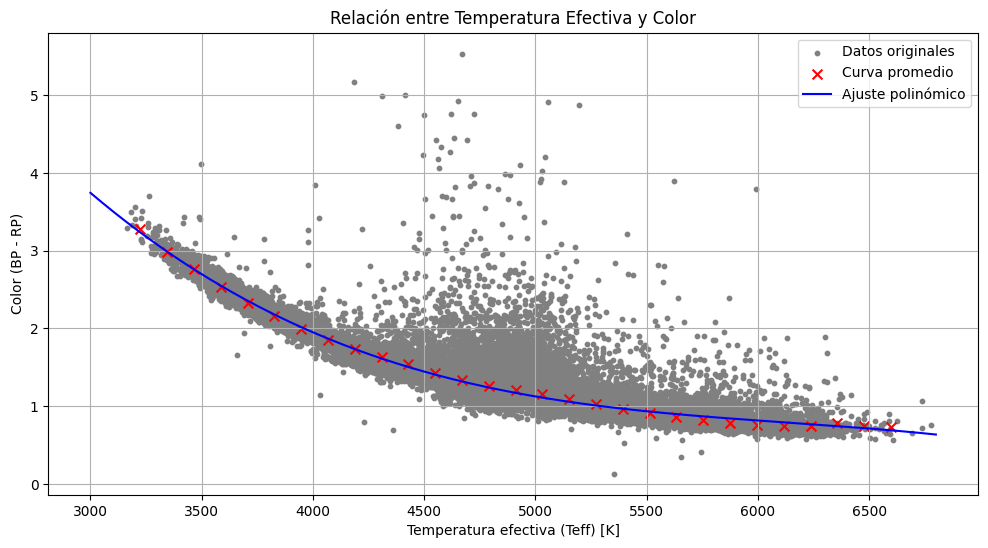

Parámetros ajustados del polinomio: [ 1.17156939 -0.54380793  0.28268418 -0.07741712]
Coeficiente de determinación (R²): 0.9982


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
Este script analiza los datos de estrellas cercanas al Sol para modelar la relación entre el color (BP - RP) y la
temperatura superficial (Teff). Se incluyen métodos como la curva promedio y el ajuste polinómico usando
Batch Gradient Descent.
"""

def lf_leer_datos(file_path):
    """
    Lee los datos desde un archivo y ajusta dinámicamente los encabezados según el número de columnas detectadas.

    Parámetros:
    - file_path (str): Ruta del archivo.

    Retorna:
    - pd.DataFrame: Datos con encabezados asignados dinámicamente.
    """
    data = pd.read_csv(file_path, sep=r'\s+', engine='python', header=None)
    columnas_base = ["ID", "Teff", "logg", "met", "alfa", "zgc", "BP", "RP"]
    num_columnas = data.shape[1]
    if num_columnas > len(columnas_base):
        columnas_base.extend([f"Extra_{i}" for i in range(len(columnas_base), num_columnas)])
    column_names = columnas_base[:num_columnas]
    data.columns = column_names
    return data

def lf_calcular_curva_promedio(lv_Teff, lv_color, n_intervals=30, min_stars=10):
    """
    Calcula la curva promedio de la distribución de los datos dividiendo el rango de temperatura en intervalos.

    Parámetros:
    - lv_Teff (np.ndarray): Temperaturas superficiales de las estrellas.
    - lv_color (np.ndarray): Colores de las estrellas (BP - RP).
    - n_intervals (int): Número de intervalos para dividir el rango de temperatura.
    - min_stars (int): Mínimo número de estrellas por intervalo para considerar el cálculo del promedio.

    Retorna:
    - np.ndarray: Temperaturas promedio para cada intervalo válido.
    - np.ndarray: Colores promedio para cada intervalo válido.
    """
    lv_min_temp, lv_max_temp = lv_Teff.min(), lv_Teff.max()
    lv_bins = np.linspace(lv_min_temp, lv_max_temp, n_intervals + 1)
    lv_bin_centers = []
    lv_mean_colors = []

    for i in range(n_intervals):
        lv_mask = (lv_Teff >= lv_bins[i]) & (lv_Teff < lv_bins[i + 1])
        if np.sum(lv_mask) > min_stars:
            lv_bin_centers.append((lv_bins[i] + lv_bins[i + 1]) / 2)
            lv_mean_colors.append(lv_color[lv_mask].mean())

    return np.array(lv_bin_centers), np.array(lv_mean_colors)

def lf_ajustar_datos_rescalados(lv_x, lv_y, grad=3, n_epocas=1000, learning_rate=0.01):
    """
    Ajusta un modelo polinómico de grado 3 usando datos reescalados con Batch Gradient Descent.

    Parámetros:
    - lv_x (np.ndarray): Datos reescalados de la variable independiente.
    - lv_y (np.ndarray): Valores de la variable dependiente.
    - grad (int): Grado del polinomio (por defecto 3).
    - n_epocas (int): Número de épocas para el algoritmo de gradiente.
    - learning_rate (float): Tasa de aprendizaje.

    Retorna:
    - np.ndarray: Coeficientes ajustados del polinomio.
    - float: Coeficiente de determinación R².
    """
    return lf_ajuste_polinomio_batch(lv_x, lv_y, grad=grad, n_epocas=n_epocas, learning_rate=learning_rate)

def lf_graficar_resultados(lv_Teff, lv_color, lv_Teff_promedio, lv_color_promedio, lv_Teff_range, lv_y_ajuste, titulo):
    """
    Genera un gráfico que muestra la relación entre Teff y color, incluyendo la curva promedio y el ajuste polinómico.

    Parámetros:
    - lv_Teff (np.ndarray): Datos completos de temperatura efectiva.
    - lv_color (np.ndarray): Datos completos de color.
    - lv_Teff_promedio (np.ndarray): Temperaturas promedio de la curva.
    - lv_color_promedio (np.ndarray): Colores promedio de la curva.
    - lv_Teff_range (np.ndarray): Rango de temperaturas para el ajuste.
    - lv_y_ajuste (np.ndarray): Valores ajustados del polinomio.
    - titulo (str): Título del gráfico.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(lv_Teff, lv_color, color="gray", s=10, label="Datos originales")
    plt.scatter(lv_Teff_promedio, lv_color_promedio, color="red", marker="x", s=50, label="Curva promedio")
    plt.plot(lv_Teff_range, lv_y_ajuste, color="blue", label="Ajuste polinómico")
    plt.xlabel("Temperatura efectiva (Teff) [K]")
    plt.ylabel("Color (BP - RP)")
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

# Leer datos
file_path = "/content/estrellas_vecindadSolar.dat"
data = lf_leer_datos(file_path)

print("Encabezados ajustados:", data.columns)
print("Primeras filas:\n", data.head())

# Seleccionar columnas relevantes y limpiar datos
relevant_columns = ["Teff", "BP", "RP"]
for col in relevant_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Eliminar filas con valores nulos
data.dropna(subset=relevant_columns, inplace=True)

# Crear variable "color"
data["color"] = data["BP"] - data["RP"]

# Filtrar rango de temperatura efectiva
filtered_data = data[(data["Teff"] >= 3000) & (data["Teff"] <= 6800)]

# Calcular curva promedio
lv_Teff = filtered_data["Teff"].values
lv_color = filtered_data["color"].values
lv_Teff_promedio, lv_color_promedio = lf_calcular_curva_promedio(lv_Teff, lv_color)

# Reescalar datos
lv_Teff_mean = lv_Teff_promedio.mean()
lv_Teff_std = lv_Teff_promedio.std()
lv_Teff_rescaled = (lv_Teff_promedio - lv_Teff_mean) / lv_Teff_std

# Ajustar polinomio
ajuste_params, ajuste_r2 = lf_ajustar_datos_rescalados(lv_Teff_rescaled, lv_color_promedio, grad=3, n_epocas=1000, learning_rate=0.01)

# Generar valores ajustados
lv_Teff_range = np.linspace(3000, 6800, 500)
lv_Teff_range_rescaled = (lv_Teff_range - lv_Teff_mean) / lv_Teff_std
lv_y_ajuste = np.polyval(ajuste_params[::-1], lv_Teff_range_rescaled)

# Graficar resultados
titulo = "Relación entre Temperatura Efectiva y Color"
lf_graficar_resultados(lv_Teff, lv_color, lv_Teff_promedio, lv_color_promedio, lv_Teff_range, lv_y_ajuste, titulo)

# Mostrar parámetros ajustados
print(f"Parámetros ajustados del polinomio: {ajuste_params}")
print(f"Coeficiente de determinación (R²): {ajuste_r2:.4f}")


Encabezados ajustados: Index(['ID', 'Teff', 'logg', 'met', 'alfa', 'zgc', 'BP', 'RP', 'Extra_8'], dtype='object')
Primeras filas:
                    ID    Teff   logg     met    alfa     zgc       BP  \
0                   #      ID   Teff    logg     met    alfa      zgc   
1  2M00000019-1924498  5518.3  4.359  -0.261   0.076  -0.234  12.5349   
2  2M00000068+5710233  5044.3  3.441  -0.158   0.009  -0.056  12.8587   
3  2M00000233+1452324  4799.0  4.493   0.362  -0.109  -0.112  12.7798   
4  2M00000535+1504343  4922.9  3.287  -0.067    0.01  -0.949   13.725   

        RP Extra_8  
0       BP      RP  
1  11.6696    None  
2  11.5817    None  
3  11.4965    None  
4  12.5469    None  

Validando existencia de columnas relevantes: Teff, BP, RP...
Validación exitosa. Columnas relevantes presentes.

Convirtiendo columnas relevantes a formato numérico y eliminando valores nulos...
Datos después de limpieza: 79502 filas restantes.
Variable 'color' calculada exitosamente.

Filtrando datos 

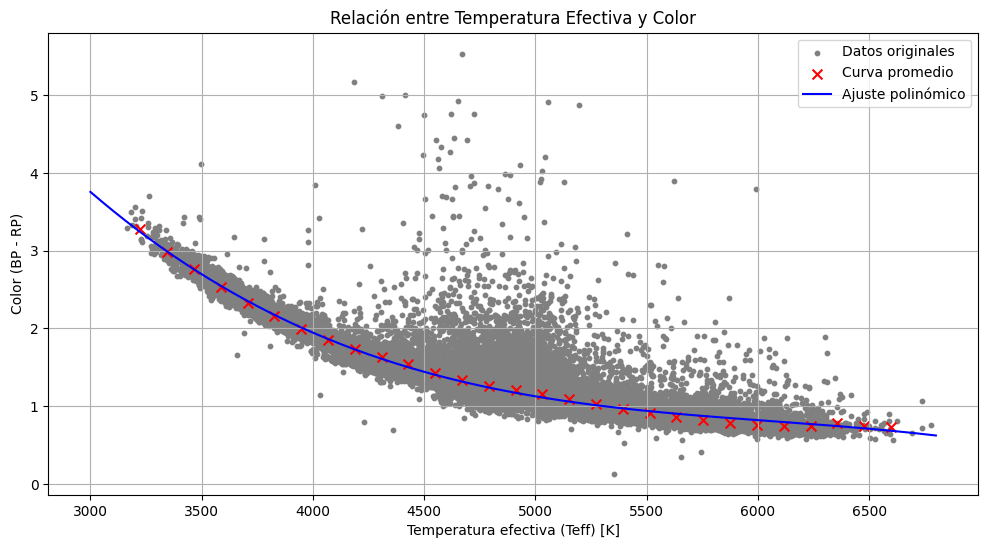


Análisis completado con éxito.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
Este script analiza los datos de estrellas cercanas al Sol para modelar la relación entre el color (BP - RP) y la
temperatura superficial (Teff). Se incluyen métodos como la curva promedio y el ajuste polinómico usando
Batch Gradient Descent.
"""

def lf_leer_datos(file_path):
    """
    Lee los datos desde un archivo y ajusta dinámicamente los encabezados según el número de columnas detectadas.

    Parámetros:
    - file_path (str): Ruta del archivo.

    Retorna:
    - pd.DataFrame: Datos con encabezados asignados dinámicamente.
    """
    data = pd.read_csv(file_path, sep=r'\s+', engine='python', header=None)
    columnas_base = ["ID", "Teff", "logg", "met", "alfa", "zgc", "BP", "RP"]
    num_columnas = data.shape[1]
    if num_columnas > len(columnas_base):
        columnas_base.extend([f"Extra_{i}" for i in range(len(columnas_base), num_columnas)])
    column_names = columnas_base[:num_columnas]
    data.columns = column_names
    return data

def lf_calcular_curva_promedio(lv_Teff, lv_color, n_intervals=30, min_stars=10):
    """
    Calcula la curva promedio de la distribución de los datos dividiendo el rango de temperatura en intervalos.

    Parámetros:
    - lv_Teff (np.ndarray): Temperaturas superficiales de las estrellas.
    - lv_color (np.ndarray): Colores de las estrellas (BP - RP).
    - n_intervals (int): Número de intervalos para dividir el rango de temperatura.
    - min_stars (int): Mínimo número de estrellas por intervalo para considerar el cálculo del promedio.

    Retorna:
    - np.ndarray: Temperaturas promedio para cada intervalo válido.
    - np.ndarray: Colores promedio para cada intervalo válido.
    """
    lv_min_temp, lv_max_temp = lv_Teff.min(), lv_Teff.max()
    lv_bins = np.linspace(lv_min_temp, lv_max_temp, n_intervals + 1)
    lv_bin_centers = []
    lv_mean_colors = []

    for i in range(n_intervals):
        lv_mask = (lv_Teff >= lv_bins[i]) & (lv_Teff < lv_bins[i + 1])
        if np.sum(lv_mask) > min_stars:
            lv_bin_centers.append((lv_bins[i] + lv_bins[i + 1]) / 2)
            lv_mean_colors.append(lv_color[lv_mask].mean())

    return np.array(lv_bin_centers), np.array(lv_mean_colors)

def lf_ajustar_datos_rescalados(lv_x, lv_y, grad=3, n_epocas=1000, learning_rate=0.01):
    """
    Ajusta un modelo polinómico de grado 3 usando datos reescalados con Batch Gradient Descent.

    Parámetros:
    - lv_x (np.ndarray): Datos reescalados de la variable independiente.
    - lv_y (np.ndarray): Valores de la variable dependiente.
    - grad (int): Grado del polinomio (por defecto 3).
    - n_epocas (int): Número de épocas para el algoritmo de gradiente.
    - learning_rate (float): Tasa de aprendizaje.

    Retorna:
    - np.ndarray: Coeficientes ajustados del polinomio.
    - float: Coeficiente de determinación R².
    """
    return lf_ajuste_polinomio_batch(lv_x, lv_y, grad=grad, n_epocas=n_epocas, learning_rate=learning_rate)

def lf_graficar_resultados(lv_Teff, lv_color, lv_Teff_promedio, lv_color_promedio, lv_Teff_range, lv_y_ajuste, titulo):
    """
    Genera un gráfico que muestra la relación entre Teff y color, incluyendo la curva promedio y el ajuste polinómico.

    Parámetros:
    - lv_Teff (np.ndarray): Datos completos de temperatura efectiva.
    - lv_color (np.ndarray): Datos completos de color.
    - lv_Teff_promedio (np.ndarray): Temperaturas promedio de la curva.
    - lv_color_promedio (np.ndarray): Colores promedio de la curva.
    - lv_Teff_range (np.ndarray): Rango de temperaturas para el ajuste.
    - lv_y_ajuste (np.ndarray): Valores ajustados del polinomio.
    - titulo (str): Título del gráfico.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(lv_Teff, lv_color, color="gray", s=10, label="Datos originales")
    plt.scatter(lv_Teff_promedio, lv_color_promedio, color="red", marker="x", s=50, label="Curva promedio")
    plt.plot(lv_Teff_range, lv_y_ajuste, color="blue", label="Ajuste polinómico")
    plt.xlabel("Temperatura efectiva (Teff) [K]")
    plt.ylabel("Color (BP - RP)")
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

# Leer datos
file_path = "/content/estrellas_vecindadSolar.dat"
data = lf_leer_datos(file_path)

print("Encabezados ajustados:", data.columns)
print("Primeras filas:\n", data.head())

# Validar datos importantes
print("\nValidando existencia de columnas relevantes: Teff, BP, RP...")
relevant_columns = ["Teff", "BP", "RP"]
missing_columns = [col for col in relevant_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Las siguientes columnas están ausentes en los datos: {missing_columns}")
print("Validación exitosa. Columnas relevantes presentes.")

# Seleccionar columnas relevantes y limpiar datos
print("\nConvirtiendo columnas relevantes a formato numérico y eliminando valores nulos...")
for col in relevant_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
data.dropna(subset=relevant_columns, inplace=True)
print(f"Datos después de limpieza: {data.shape[0]} filas restantes.")

# Crear variable "color"
data["color"] = data["BP"] - data["RP"]
print("Variable 'color' calculada exitosamente.")

# Filtrar rango de temperatura efectiva
print("\nFiltrando datos para temperaturas entre 3000 y 6800 K...")
filtered_data = data[(data["Teff"] >= 3000) & (data["Teff"] <= 6800)]
print(f"Datos filtrados: {filtered_data.shape[0]} filas restantes.")

# Calcular curva promedio
print("\nCalculando curva promedio...")
lv_Teff = filtered_data["Teff"].values
lv_color = filtered_data["color"].values
lv_Teff_promedio, lv_color_promedio = lf_calcular_curva_promedio(lv_Teff, lv_color)
print(f"Curva promedio calculada: {len(lv_Teff_promedio)} puntos válidos.")

# Reescalar datos
print("\nReescalando datos para el ajuste polinómico...")
lv_Teff_mean = lv_Teff_promedio.mean()
lv_Teff_std = lv_Teff_promedio.std()
lv_Teff_rescaled = (lv_Teff_promedio - lv_Teff_mean) / lv_Teff_std
print("Datos reescalados exitosamente.")

# Ajustar polinomio
print("\nAjustando polinomio de grado 3 con Batch Gradient Descent...")
ajuste_params, ajuste_r2 = lf_ajustar_datos_rescalados(lv_Teff_rescaled, lv_color_promedio, grad=3, n_epocas=1000, learning_rate=0.01)
print(f"Parámetros ajustados: {ajuste_params}")
print(f"Coeficiente de determinación (R²): {ajuste_r2:.4f}")

# Generar valores ajustados
print("\nGenerando valores ajustados para el rango de temperaturas...")
lv_Teff_range = np.linspace(3000, 6800, 500)
lv_Teff_range_rescaled = (lv_Teff_range - lv_Teff_mean) / lv_Teff_std
lv_y_ajuste = np.polyval(ajuste_params[::-1], lv_Teff_range_rescaled)
print("Valores ajustados generados exitosamente.")

# Graficar resultados
titulo = "Relación entre Temperatura Efectiva y Color"
print("\nGraficando resultados...")
lf_graficar_resultados(lv_Teff, lv_color, lv_Teff_promedio, lv_color_promedio, lv_Teff_range, lv_y_ajuste, titulo)

print("\nAnálisis completado con éxito.")
